# Exploring Vibrations and Automatic Control: A Short Project

Hi, I’m **Sid Sharma**, a fourth-year undergraduate student in **Mechanical Engineering** at the **University of British Columbia (UBC)**. This project is a personal effort to study vibrations and automatic control, focusing on how dynamic systems behave and how engineers can better predict and influence their motion.

Understanding vibrations and control systems is fundamental to many areas of engineering, from ensuring the stability of structures to improving the efficiency of machines and robotics. Through this project, I aim to build a practical understanding of these principles while developing essential skills like modeling, simulation, and analysis.

I began with a simple plot of a mass-spring-damper system, exploring how key parameters like damping and stiffness affect the system’s behavior. From there, I developed dynamic simulations that allow users to interact with variables and see their effects in real time. Over time, I added features like force-driven responses, magnification factor plots, and additional calculated insights to deepen my analysis.

Expanding into control systems, I created interactive plots where users could adjust control parameters and observe their impact on system stability and performance. This hands-on approach helped me connect theoretical concepts to their practical applications. I am now working on a two-degree-of-freedom inverted pendulum simulation, tackling a classic problem in control engineering to further enhance my skills.

This work has been an excellent way to develop critical engineering competencies like problem-solving, computational modeling, and system design. These skills are directly applicable to research and industry, where the ability to model and control dynamic systems is essential for innovation and effective solutions. By continuing to build on this foundation, I hope to contribute meaningfully to engineering challenges in the future.

# Mass-Spring-Damper System

The equation of motion for a mass-spring-damper system is:

$$
m\ddot{x} + c\dot{x} + kx = 0
$$

Where:
- \( m \) is the mass (kg)  
- \( c \) is the damping coefficient (N·s/m)  
- \( k \) is the spring constant (N/m)  
- \( x \) is the displacement (m)

We will solve this using numerical integration.

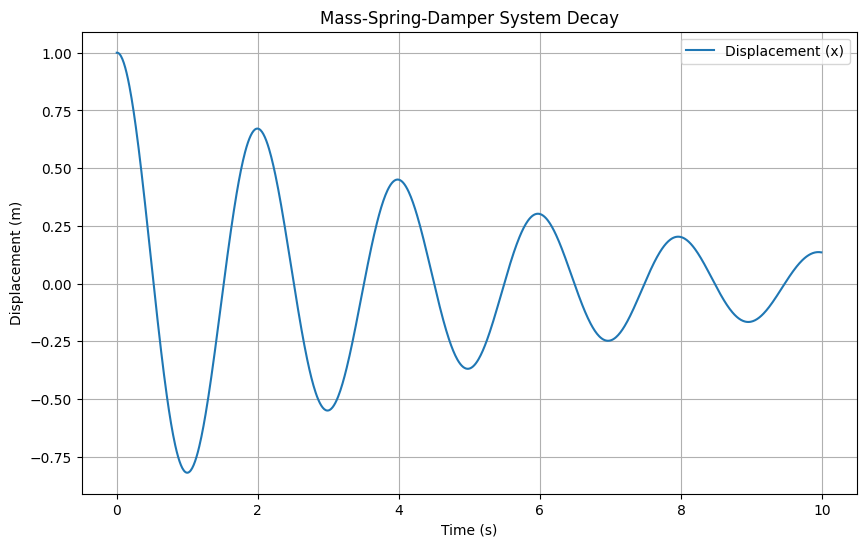

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
m = 1.0   # Mass (kg)
k = 10.0  # Spring constant (N/m)
c = 0.5   # Damping coefficient (N·s/m)

# Time setup
t_max = 10  # seconds
dt = 0.01   # time step
t = np.arange(0, t_max, dt)

# Initial conditions
x = np.zeros_like(t)  # Displacement
v = np.zeros_like(t)  # Velocity
x[0] = 1.0  # Initial displacement (m)

# Euler Method for numerical integration
for i in range(1, len(t)):
    a = (-c * v[i-1] - k * x[i-1]) / m  # Acceleration
    v[i] = v[i-1] + a * dt              # Velocity update
    x[i] = x[i-1] + v[i-1] * dt        # Displacement update

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Displacement (x)')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Mass-Spring-Damper System Decay')
plt.legend()
plt.grid(True)
plt.show()

# Mass-Spring-Damper System Simulation

The dynamics of a **mass-spring-damper** system are governed by the second-order differential equation:


$$
m\ddot{x}(t) + c\dot{x}(t) + kx(t) = 0
$$


Where:  
- \( m \) → **Mass** (kg)  
- \( c \) → **Damping coefficient** (N·s/m)  
- \( k \) → **Spring constant** (N/m)  
- \( x(t) \) → **Displacement** (m)  
- \( \dot{x}(t) \) → **Velocity** (m/s)  
- \( \ddot{x}(t) \) → **Acceleration** (m/s²)

---

This simulation visualizes the **damped oscillation** of a mass-spring-damper system over time.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox

# Function for solving the mass-spring-damper system using Euler's method
def simulate_system(m=1.0, c=0.5, k=10.0):
    # Time setup
    t_max = 10  # seconds
    dt = 0.01   # time step
    t = np.arange(0, t_max, dt)

    # Initial conditions
    x = np.zeros_like(t)  # Displacement
    v = np.zeros_like(t)  # Velocity
    x[0] = 1.0  # Initial displacement (m)

    # Euler Method for numerical integration
    for i in range(1, len(t)):
        a = (-c * v[i-1] - k * x[i-1]) / m  # Acceleration
        v[i] = v[i-1] + a * dt              # Velocity update
        x[i] = x[i-1] + v[i-1] * dt         # Displacement update

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, x, label='Displacement (x)')
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.title('Mass-Spring-Damper System Simulation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive sliders for parameter adjustment
mass_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Mass (kg)')
damping_slider = FloatSlider(value=0.5, min=0.0, max=5.0, step=0.1, description='Damping (Ns/m)')
spring_slider = FloatSlider(value=10.0, min=1.0, max=20.0, step=0.5, description='Spring (N/m)')

# Link the sliders to the function
interactive_plot = interact(simulate_system, m=mass_slider, c=damping_slider, k=spring_slider)

# Layout for displaying sliders
#ui = VBox([mass_slider, damping_slider, spring_slider])
#ui

interactive(children=(FloatSlider(value=1.0, description='Mass (kg)', max=5.0, min=0.1), FloatSlider(value=0.5…

## Mass-Spring-Damper with Force

This notebook simulates a **mass-spring-damper system** and allows for real-time adjustments of system parameters such as **mass** (`m`), **spring constant** (`k`), **damping coefficient** (`c`), and the **force amplitude** (`F0`). The goal is to visualize how changes in these parameters affect the behavior of the system.

### System Overview

The mass-spring-damper system is governed by the following second-order differential equation:

$$
m \ddot{x} + c \dot{x} + k x = F(t)
$$

Where:
- \( m \) is the mass of the object (in kg),
- \( c \) is the damping coefficient (in N·s/m),
- \( k \) is the spring constant (in N/m),
- \( F(t) = F_0 \cos(\omega t) \) is the external forcing function (in N),
- \( x(t) \) is the displacement of the mass (in meters),
- \( \dot{x}(t) \) and \( \ddot{x}(t) \) are the velocity and acceleration of the mass, respectively.

The equation can be solved numerically using the **Euler method** or **Runge-Kutta method** to simulate the motion over time.

### Parameters and Simulation

The system's behavior is defined by the following parameters:

- **Mass (m)**: The mass of the object attached to the spring.
- **Spring Constant (k)**: The stiffness of the spring.
- **Damping Coefficient (c)**: The resistance exerted on the moving mass.
- **Force Amplitude (F0)**: The amplitude of the applied periodic force.
- **Force Frequency (ω)**: The frequency of the periodic applied force.

The displacement of the mass \( x(t) \) is calculated over time, and the system's response is graphed dynamically as the parameters are adjusted.

### Mathematical Formulation

The equations governing the system dynamics are:

1. **Kinetic Energy (T)**:
    $$
    T = \frac{1}{2} m \dot{x}^2
    $$

2. **Potential Energy (U)**:
    $$
    U = \frac{1}{2} k x^2
    $$

3. **Lagrangian (L)**:
    $$
    L = T - U = \frac{1}{2} m \dot{x}^2 - \frac{1}{2} k x^2
    $$

From this, we can derive the equations of motion using the Euler-Lagrange equation.

### Simulation Setup

The simulation runs for **5 seconds** with a time step of **0.01 seconds**. The values of \( m \), \( c \), \( k \), and \( F_0 \) are adjustable using interactive sliders. The graph updates in real-time to show the displacement and velocity of the mass over time, as well as the system's response to the changing parameters.

### Example Simulation
- Initial conditions: \( x(0) = 1.0 \, m \), \( v(0) = 0.0 \, m/s \)
- Force amplitude: Adjustable
- Damping coefficient: Adjustable
- Spring constant: Adjustable

Use the sliders to modify these parameters and observe the system’s behavior.

---

### Interactive Controls
- **Mass (kg)**: Adjust the mass of the object.
- **Damping Coefficient (N·s/m)**: Change the damping resistance.
- **Spring Constant (N/m)**: Modify the spring stiffness.
- **Force Amplitude (N)**: Adjust the amplitude of the applied force.
- **Force Frequency (rad/s)**: Control the frequency of the applied force.

---

#### Adjust the sliders and click the button to simulate the system dynamically.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox

# Function for solving the mass-spring-damper system using Euler's method with force
def simulate_system(m=1.0, c=0.5, k=10.0, F0=0.0, omega=1.0):
    # Time setup
    t_max = 10  # seconds
    dt = 0.01   # time step
    t = np.arange(0, t_max, dt)

    # Initial conditions
    x = np.zeros_like(t)  # Displacement
    v = np.zeros_like(t)  # Velocity
    x[0] = 1.0  # Initial displacement (m)

    # Euler Method for numerical integration
    for i in range(1, len(t)):
        a = (-c * v[i-1] - k * x[i-1] + F0 * np.cos(omega * t[i])) / m  # Acceleration with force
        v[i] = v[i-1] + a * dt              # Velocity update
        x[i] = x[i-1] + v[i-1] * dt         # Displacement update

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, x, label='Displacement (x)')
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.title('Mass-Spring-Damper System Simulation with Force')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive sliders for parameter adjustment
mass_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Mass (kg)')
damping_slider = FloatSlider(value=0.5, min=0.0, max=5.0, step=0.1, description='Damping (Ns/m)')
spring_slider = FloatSlider(value=10.0, min=1.0, max=20.0, step=0.5, description='Spring (N/m)')
force_slider = FloatSlider(value=0.0, min=0.0, max=10.0, step=0.1, description='Force Amplitude (N)')
omega_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Force Frequency (Hz)')

# Link the sliders to the function
interactive_plot = interact(simulate_system, 
                            m=mass_slider, 
                            c=damping_slider, 
                            k=spring_slider,
                            F0=force_slider,
                            omega=omega_slider)



interactive(children=(FloatSlider(value=1.0, description='Mass (kg)', max=5.0, min=0.1), FloatSlider(value=0.5…

# Mass-Spring-Damper System with Force: Dynamic Simulation

This simulation models a **Mass-Spring-Damper system** under the influence of an external sinusoidal force. The system’s behavior is analyzed based on key mechanical parameters, such as mass \(m\), damping coefficient \(c\), spring constant \(k\), force amplitude \(F_0\), and force frequency \(\omega\). We will compute and visualize the following key parameters and system responses:

## Key Parameters

### 1. **Natural Frequency (\(\omega_n\))**:
The natural frequency is the frequency at which the system oscillates when undamped. It is calculated using the formula:

$$
\omega_n = \sqrt{\frac{k}{m}}
$$

Where:
- \(k\) is the spring constant (N/m),
- \(m\) is the mass (kg).

### 2. **Damped Frequency (\(\omega_d\))**:
The damped frequency is the actual oscillation frequency when damping is present. It is calculated as:

$$
\omega_d = \omega_n \sqrt{1 - \zeta^2}
$$

Where:
- \(\zeta\) is the **damping ratio**.

### 3. **Damping Ratio (\(\zeta\))**:
The damping ratio determines how much the system is damped, affecting the amplitude decay over time. It is calculated as:

$$
\zeta = \frac{c}{2\sqrt{km}}
$$

Where:
- \(c\) is the damping coefficient (Ns/m).

### 4. **Resonance Frequency (\(\omega_r\))**:
The resonance frequency is the frequency at which the system experiences maximum displacement due to external force. The resonance frequency is shifted by damping and is calculated as:

$$
\omega_r = \omega_n \sqrt{1 - 2\zeta^2}
$$

### 5. **Magnification Factor (Frequency Response)**:
The **Magnification Factor** represents the system's response to external force at different frequencies. It is calculated as:

$$
\text{Magnification Factor} = \frac{1}{\sqrt{(1 - (\frac{\omega}{\omega_n})^2)^2 + (2\zeta\frac{\omega}{\omega_n})^2}}
$$

Where:
- \(\omega\) is the excitation frequency.

The magnification factor is plotted as a function of frequency to illustrate the system’s resonance behavior.

## Visualization

### 1. **Displacement over Time**:
This plot shows the displacement of the mass as a function of time under the influence of the sinusoidal external force.

- **X-axis**: Time (seconds),
- **Y-axis**: Displacement (meters).

### 2. **Frequency Response - Magnification Factor vs Frequency**:
This plot illustrates the frequency response of the system, showing how the magnification factor changes with excitation frequency. The plot also marks:
- The **resonance frequency (\(\omega_r\))**,
- The **damped frequency (\(\omega_d\))**.

- **X-axis**: Frequency (Hz),
- **Y-axis**: Magnification Factor.

## Parameters and Sliders

Interactive sliders allow you to modify the following parameters and observe their effects on the system’s behavior:

- **Mass (kg)**: Affects the natural frequency and system dynamics.
- **Damping (Ns/m)**: Determines the damping ratio and affects the system's ability to oscillate.
- **Spring (N/m)**: Affects the system's stiffness and natural frequency.
- **Force Amplitude (N)**: Controls the magnitude of the external force.
- **Force Frequency (Hz)**: Controls the frequency of the external force applied to the system.

Adjust these parameters to visualize how the system behaves in different scenarios, such as low damping versus high damping, and near-resonance conditions.

### Key Insights
- **Low Damping**: If the damping ratio \(\zeta\) is low, the system resonates strongly at the resonance frequency, leading to large oscillations.
- **High Damping**: High damping reduces the system's oscillations, leading to smaller displacements over time.
- **Resonance Peak**: The system experiences a resonance peak when the frequency of the external force matches the natural frequency of the system, causing large oscillations.

These plots and calculations provide insights into the dynamics of the system, including the effects of damping and frequency on system behavior.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox

# Function for solving the mass-spring-damper system using Euler's method with force
def simulate_system(m=1.0, c=0.5, k=10.0, F0=0.0, omega=1.0):
    # Natural frequency (undamped)
    omega_n = np.sqrt(k / m)
    
    # Damping ratio
    zeta = c / (2 * np.sqrt(k * m))
    
    # Resonance frequency (shifted due to damping)
    omega_r = omega_n * np.sqrt(1 - 2*(zeta**2))
    
    # Damped frequency (actual oscillation frequency)
    omega_d = omega_n * np.sqrt(1 - zeta**2)
    
    # Time setup
    t_max = 10  # seconds
    dt = 0.01   # time step
    t = np.arange(0, t_max, dt)

    # Initial conditions
    x = np.zeros_like(t)  # Displacement
    v = np.zeros_like(t)  # Velocity
    x[0] = 1.0  # Initial displacement (m)

    # Euler Method for numerical integration
    for i in range(1, len(t)):
        a = (-c * v[i-1] - k * x[i-1] + F0 * np.cos(omega * t[i])) / m  # Acceleration with force
        v[i] = v[i-1] + a * dt              # Velocity update
        x[i] = x[i-1] + v[i-1] * dt         # Displacement update

    # Plotting the results (Displacement over time)
    plt.figure(figsize=(12, 6))  # Increased figure size for better visibility
    plt.plot(t, x, label='Displacement (x)', linewidth=2)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Displacement (m)', fontsize=14)
    plt.title('Mass-Spring-Damper System Simulation with Force', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

    # Plotting Magnification Factor vs Frequency
    plt.figure(figsize=(12, 6))
    frequencies = np.linspace(0.1, 3 * omega_n, 300)
    magnification_factors = 1 / np.sqrt((1 - (frequencies / omega_n)**2)**2 + (2 * zeta * (frequencies / omega_n))**2)
    plt.plot(frequencies, magnification_factors, label='Magnification Factor', color='b', linewidth=2)
    plt.axvline(x=omega_r, color='r', linestyle='--', label="Resonance Frequency (ω_r)")
    plt.axvline(x=omega_d, color='g', linestyle='--', label="Damped Frequency (ω_d)")
    plt.xlabel('Frequency (Hz)', fontsize=14)
    plt.ylabel('Magnification Factor', fontsize=14)
    plt.title('Frequency Response - Magnification Factor vs Frequency', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

    # Output calculated parameters
    print(f"Natural Frequency (ω_n): {omega_n:.2f} rad/s")
    print(f"Resonance Frequency (ω_r): {omega_r:.2f} rad/s")
    print(f"Damped Frequency (ω_d): {omega_d:.2f} rad/s")
    print(f"Damping Ratio (ζ): {zeta:.2f}")
    print(f"Magnification Factor at ω={omega:.2f}: {magnification_factors[np.abs(frequencies - omega).argmin()]:.2f}")

# Interactive sliders for parameter adjustment
mass_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Mass (kg)', style={'description_width': 'initial'})
damping_slider = FloatSlider(value=0.5, min=0.0, max=5.0, step=0.1, description='Damping (Ns/m)', style={'description_width': 'initial'})
spring_slider = FloatSlider(value=10.0, min=1.0, max=20.0, step=0.5, description='Spring (N/m)', style={'description_width': 'initial'})
force_slider = FloatSlider(value=0.0, min=0.0, max=10.0, step=0.1, description='Force Amplitude (N)', style={'description_width': 'initial'})
omega_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Force Frequency (Hz)', style={'description_width': 'initial'})

# Link the sliders to the function
interactive_plot = interact(simulate_system, 
                            m=mass_slider, 
                            c=damping_slider, 
                            k=spring_slider,
                            F0=force_slider,
                            omega=omega_slider)



interactive(children=(FloatSlider(value=1.0, description='Mass (kg)', max=5.0, min=0.1, style=SliderStyle(desc…

# Mass-Spring-Damper System with Laplace Transforms and Transfer Function

## System Description
We are analyzing a **single-degree-of-freedom (SDOF) mass-spring-damper system** that undergoes motion due to an external force. The system is subject to damping and spring forces. We are interested in deriving the **transfer function** using the Laplace transform.

## Dynamic Equation of Motion
The motion of the system is governed by Newton's second law:

$$
M\ddot{x} + c\dot{x} + kx = F(t)
$$

Where:
- \( M \) is the mass of the object (kg),
- \( c \) is the damping coefficient (N·s/m),
- \( k \) is the spring constant (N/m),
- \( x \) is the displacement of the mass (m),
- \( F(t) \) is the external forcing function.

### Applying the Laplace Transform
Taking the Laplace transform of the equation assuming zero initial conditions (i.e., the system starts at static equilibrium), we get:

$$
M(s^2 X(s)) + c(s X(s)) + k X(s) = F(s)
$$

Solving for the displacement \( X(s) \) in terms of the force \( F(s) \), we get the transfer function \( G(s) \):

$$
G(s) = \frac{X(s)}{F(s)} = \frac{1}{Ms^2 + cs + k}
$$

This transfer function describes the relationship between the input force and the displacement output.

## Damped Natural Frequency and Damping Ratio
The **natural frequency** \( \omega_n \) and the **damping ratio** \( \zeta \) are key parameters in the system's behavior. These can be derived from the coefficients of the characteristic equation:

### Natural Frequency:
The natural frequency \( \omega_n \) is given by:

$$
\omega_n = \sqrt{\frac{k}{M}}
$$

### Damping Ratio:
The damping ratio \( \zeta \) is given by:

$$
\zeta = \frac{c}{2\sqrt{kM}}
$$

### Damped Natural Frequency:
The **damped natural frequency** \( \omega_d \), which accounts for damping effects, is:

$$
\omega_d = \omega_n \sqrt{1 - \zeta^2}
$$

### Critical Damping:
Critical damping occurs when \( \zeta = 1 \), which leads to the system returning to equilibrium as quickly as possible without oscillation.

## Magnification Factor and Resonance Frequency
The **magnification factor** (also known as the **amplitude ratio**) describes the system's response at resonance frequency. The magnification factor at resonance is given by:

$$
M(\omega) = \frac{1}{2\zeta \sqrt{1 - \left(\frac{\omega}{\omega_n}\right)^2}}
$$

At **resonance** (when the driving frequency \( \omega = \omega_n \)), the magnification factor theoretically tends to infinity for a lightly damped system (\( \zeta \to 0 \)).

## Transfer Function and its Application
The transfer function plays an essential role in analyzing and controlling the system's behavior. By analyzing the poles and zeros of the transfer function, we can predict the system’s response to different inputs, such as sinusoidal forces or step functions. 

### Block Diagram of the System
The system can be represented in a block diagram where the input force \( F(s) \) is processed through the transfer function \( G(s) \), resulting in the output displacement \( X(s) \). The system can be analyzed using feedback control strategies to improve stability or response time.

## Practical Application of the Laplace Transform
In control systems, the Laplace transform is used to convert the system's differential equations into algebraic equations that are easier to analyze. The transfer function is crucial for designing controllers that ensure the system behaves as desired under different operating conditions.

### Example of Laplace Transform Application:
For a mass-spring-damper system with known parameters, the Laplace transform can be applied to find the output displacement in response to a given force input, allowing for the analysis of system dynamics in the s-domain.

## Interpretation of the Graph

The graph generated from solving this Laplace-transformed system will represent the system's response over time. The key features to analyze are:

- **Poles**: These are the values of \( s \) for which the denominator of the transfer function goes to zero. Poles define the system's stability and response.
  
- **Zeros**: These are values of \( s \) that make the numerator zero and determine the system’s frequency response characteristics.

### Plotting the Poles

To find the poles of the system, we solve the characteristic equation from the denominator of the transfer function:

$$
M s^2 + c s + k = 0
$$

The solutions to this quadratic equation will give the poles. The nature of these poles—whether they are real or complex—determines the behavior of the system, such as whether it is underdamped, critically damped, or overdamped.

### Bode Plot

A **Bode plot** is a graph of the system's frequency response. It consists of two plots: one showing the magnitude and the other showing the phase of the system's transfer function over a range of frequencies. This plot helps us understand how the system will respond to sinusoidal inputs of different frequencies.

**Magnitude Plot**: The magnitude of the transfer function \( |G(j\omega)| \) versus frequency \( \omega \).

**Phase Plot**: The phase of the transfer function \( \arg(G(j\omega)) \) versus frequency \( \omega \).

The Bode plot is particularly useful for understanding resonance, stability margins, and bandwidth.

## Conclusion

By using the Laplace transform, we can easily transition from a time-domain system description to a frequency-domain representation. The poles provide insight into system stability, while the Bode plot helps us understand how the system reacts to different frequency inputs. These analyses are foundational in control systems engineering, where system behavior and stability are of utmost importance.

---
The next steps would involve performing these calculations programmatically and plotting the system's frequency response dynamically based on user-adjustable parameters like damping ratio, spring constant, and mass.

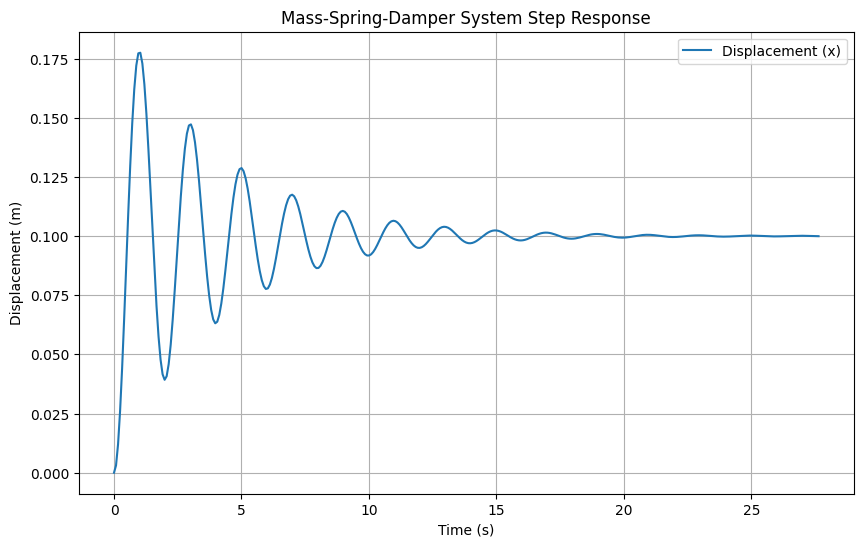

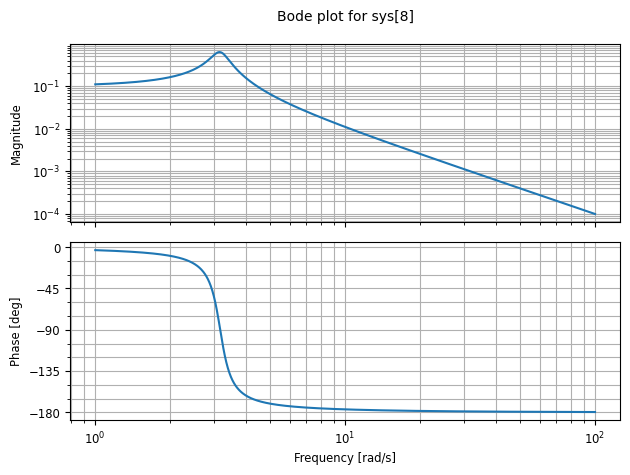

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the system parameters
m = 1.0  # Mass (kg)
c = 0.5  # Damping coefficient (Ns/m)
k = 10.0  # Spring constant (N/m)

# Define the transfer function for the system
# Transfer function: H(s) = 1 / (m * s^2 + c * s + k)
num = [1]  # Numerator of the transfer function (for input)
den = [m, c, k]  # Denominator of the transfer function (s^2 + c/m * s + k/m)

# Create the transfer function using control library
system = ctrl.TransferFunction(num, den)

# Plot the system's step response
t, y = ctrl.step_response(system)

# Plot the response
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Displacement (x)')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Mass-Spring-Damper System Step Response')
plt.grid(True)
plt.legend()
plt.show()

# Bode plot (frequency response)
ctrl.bode_plot(system)

# PD-Controlled Mass-Spring-Damper System Simulation

## Overview

In this simulation, we model the behavior of a **mass-spring-damper system** under the influence of a **Proportional-Derivative (PD) controller**. The system's response to a disturbance will be analyzed by adjusting the system parameters, including the mass \(m\), damping coefficient \(c\), spring constant \(k\), and the control gains \(K_p\) (proportional gain) and \(K_d\) (derivative gain).

The simulation will help us understand the dynamic behavior of the system, including key control aspects such as damping, stability, and control performance. We will visualize the **step response**, the **Bode plot** for frequency response analysis, and **poles** to assess system stability. The aim is to give the user insight into how varying the control gains and system parameters impacts the system's motion and control effectiveness.

## Control Objective

The main objective of this system is to control the **displacement** of the mass by applying a PD controller. The controller continuously adjusts the applied force based on the difference between the desired displacement \(x_{\text{desired}}\) and the current displacement \(x\), as well as the rate of change of displacement (velocity).

**Proportional control** reacts to the current error, i.e., the difference between the desired displacement and the current position. **Derivative control** reacts to the rate of change of error, i.e., how fast the error is changing, to prevent overshooting and oscillations.

By adjusting these parameters, the user can tune the system's response to achieve an optimal balance between fast response and minimal oscillations (damping).

## Mathematical Description

The system can be modeled with the following equation of motion:

$$
m \ddot{x} + c \dot{x} + k x = F_{\text{control}}
$$

Where:
- \( m \) is the mass of the object
- \( c \) is the damping coefficient
- \( k \) is the spring constant
- \( x \) is the displacement of the mass
- \( F_{\text{control}} \) is the control force applied by the PD controller

The PD controller can be expressed as:

$$
F_{\text{control}} = K_p (x_{\text{desired}} - x) + K_d \dot{x}
$$

Where:
- \( K_p \) is the proportional gain
- \( K_d \) is the derivative gain
- \( x_{\text{desired}} \) is the desired displacement

## Dynamic System Simulation and Visualization

### Key Concepts to Observe

1. **Step Response**: The system’s response to a step input (disturbance) over time. We are particularly interested in the time it takes for the system to stabilize and the amount of oscillation.
   
2. **Bode Plot**: The Bode plot shows the system’s frequency response, providing insights into stability. This helps assess the gain margin and phase margin, which are important for ensuring stability in the design of controllers.

3. **Poles of the System**: The poles are critical for determining system stability. A system is stable if the real part of all poles is negative. The poles can be visualized to show how control affects the system's stability.

4. **Tuning the Controller**: Adjusting the PD gains \(K_p\) and \(K_d\) influences the system's response:
   - A higher \(K_p\) results in a faster response but may cause overshooting or oscillations.
   - A higher \(K_d\) increases damping, reducing overshoot and improving stability but may slow down the response.

### Interactive Controls

Using sliders, the user can control:
- The **mass** \(m\), **damping** \(c\), and **spring constant** \(k\), which directly affect the natural frequency and damping of the system.
- The **desired displacement** \(x_{\text{desired}}\), which is the target position for the mass.
- The **PD controller gains** \(K_p\) and \(K_d\), allowing the user to experiment with different control strategies.

### Visual Output

1. **Displacement over Time**: Shows the system's response to the disturbance.
   
2. **Bode Plot**: Displays the frequency response and allows the user to analyze how the system behaves at different frequencies.

3. **Poles**: These indicate the stability of the system, helping the user understand how the system’s dynamics are affected by the controller.

4. **Control Performance**: With the Bode plot and time-domain response, the user can optimize control by adjusting the PD gains and system parameters.

## Conclusion

The PD controller offers a mechanism to control the dynamic behavior of the mass-spring-damper system. By varying the controller gains and system parameters, users can understand the impact of each on the system’s stability and performance. This simulation serves as an introduction to automatic control theory, providing hands-on experience with a simple mechanical system.

### Key Takeaways:
- **Proportional control** increases responsiveness but can lead to overshoot.
- **Derivative control** helps reduce overshoot and improves stability.
- **Poles** and the **Bode plot** provide essential information for tuning the system and ensuring stability.
- **Optimization**: The optimal PD gains depend on the system’s damping ratio and natural frequency, which can be adjusted to achieve the desired performance in terms of settling time and overshoot.

By simulating the system and adjusting parameters interactively, users gain valuable insight into the role of control in shaping system dynamics.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interact, FloatSlider, VBox

# System Parameters
def simulate_system(m=1.0, c=0.5, k=10.0, x_desired=1.0, Kp=10.0, Kd=5.0):
    # Transfer Function of the Mass-Spring-Damper System with PD Control
    num = [Kp, Kd]  # Numerator: PD controller terms
    den = [m, c + Kd, k + Kp]  # Denominator: system's mass, damping, spring

    # Create transfer function model
    system = signal.TransferFunction(num, den)

    # Time vector for simulation
    t = np.linspace(0, 10, 1000)

    # Simulate the step response of the system
    t, y = signal.step(system, T=t)

    # Plot the response (Displacement over time)
    plt.figure(figsize=(12, 6))
    plt.plot(t, y, label='System Response (x(t))')
    plt.title('Mass-Spring-Damper System Response with PD Control')
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Bode Plot (Magnitude and Phase)
    plt.figure(figsize=(12, 6))
    _, mag, phase = signal.bode(system)
    
    plt.subplot(2, 1, 1)
    plt.semilogx(_, mag)
    plt.title('Bode Plot of Mass-Spring-Damper System')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.semilogx(_, phase)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (degrees)')
    plt.grid(True)
    plt.show()

    # Display the poles of the system
    poles = np.roots(den)
    print(f"Poles of the system: {poles}")

# Create interactive sliders for user input
m_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Mass (kg)')
c_slider = FloatSlider(value=0.5, min=0.0, max=5.0, step=0.1, description='Damping (Ns/m)')
k_slider = FloatSlider(value=10.0, min=1.0, max=50.0, step=0.5, description='Spring (N/m)')
x_desired_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Desired Displacement (m)')
Kp_slider = FloatSlider(value=10.0, min=0.1, max=100.0, step=1.0, description='Proportional Gain (Kp)')
Kd_slider = FloatSlider(value=5.0, min=0.1, max=50.0, step=1.0, description='Derivative Gain (Kd)')

# Link the sliders to the simulation function
interactive_plot = interact(simulate_system, 
                            m=m_slider, 
                            c=c_slider, 
                            k=k_slider,
                            x_desired=x_desired_slider,
                            Kp=Kp_slider,
                            Kd=Kd_slider)

# Display the sliders in a VBox layout
#ui = VBox([m_slider, c_slider, k_slider, x_desired_slider, Kp_slider, #Kd_slider])
#ui

interactive(children=(FloatSlider(value=1.0, description='Mass (kg)', max=5.0, min=0.1), FloatSlider(value=0.5…

### Double Pendulum Simulation 

This animation simulates the dynamics of a double pendulum system under gravity. The system consists of two pendulums connected to each other and allows visualization of their motions as they interact. The physics behind the simulation is based on the equations of motion for the double pendulum, which involve nonlinear differential equations due to the coupled rotations of the two pendulums. 

The animation is created using `matplotlib` and shows the behavior of the pendulum system over time. The simulation uses Euler's method to integrate the equations of motion, and the system's response is plotted as it evolves. The angular positions of the two pendulums are updated at each time step, and the animation captures their motion as a function of time.

### Pendulum Animation
Below is the simulation of the double pendulum's motion:

<video width="640" height="480" controls>
  <source src="pendulum_animation.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>
Credits:
[6] Matplotlib Development Team.

#### The Triple Pendulum Problem: Cause why not?

In this updated challenge, I tackle the dynamics of a **triple pendulum** system, expanding on previous work with the inverted double pendulum. The system involves three pendulums connected by rigid rods, each exhibiting complex dynamics. For this project, I’ll apply advanced control strategies and use **Kane’s method** to solve the dynamics, as it simplifies complex systems like the triple pendulum.

#### System Changes:

I have modified the physical parameters of the pendulum system, introducing damping and adjusting the lengths and masses:

- **Gravitational acceleration**: 
  - \( g = 9.8 \, \text{m/s}^2 \)

- **Damping**: A damping coefficient has been added to the system to prevent it from crashing within a few seconds and to ensure stable simulation dynamics. For ease of algebra, the damping will not be included in the equations, as they get very, very long.

#### Equations of Motion and Normal Mode Analysis

For small angles, we approximate the forces involved in the pendulum's movement. Using the equations for the forces acting on each pendulum, the system dynamics are simplified. The resulting equations of motion for the three pendulums are:

$$
m_1 \ddot{x}_1 = T_2 \sin(\theta_2) - T_1 \sin(\theta_1) - \beta_1 \dot{x}_1
$$

$$
m_2 \ddot{x}_2 = T_3 \sin(\theta_3) - T_2 \sin(\theta_2) - \beta_2 \dot{x}_2
$$

$$
m_3 \ddot{x}_3 = -T_3 \sin(\theta_3) - \beta_3 \dot{x}_3
$$

Where \(T_1\), \(T_2\), and \(T_3\) are the tensions in the rods between the pendulums, and \(x_1, x_2, x_3\) represent the displacements of the pendulums. The terms \(\beta_1\), \(\beta_2\), and \(\beta_3\) represent the damping coefficients applied to each pendulum.

For small oscillations, we simplify the equations using small-angle approximations:

$$
\ddot{x}_1 + \omega_0^2 (ax_1 - bx_2) = R \omega_0^2 \eta
$$

$$
\ddot{x}_2 + \omega_0^2 (-ax_1 + bx_2 - cx_3) = 0
$$

$$
\ddot{x}_3 + \omega_0^2 (cx_3 - ax_2) = 0
$$

Here: a,b,c,R are all coefficients.

This leads us to a system of linear equations that can be solved for the **normal modes** of oscillation. The system is represented in matrix form as:

$$
A \mathbf{x} = \mathbf{b}
$$

Where **A** is the coefficient matrix, **x** is the vector of amplitudes, and **b** is the source vector. Solving this system yields the **normal mode frequencies** and **relative amplitudes** for the system.

#### Applying Kane's Method

In the case of a **nonholonomic system**, Kane’s method is particularly useful as it avoids the need to introduce Lagrange multipliers. Kane’s method is based on generalized coordinates and partial velocities, which makes it easier to derive the equations of motion for complex systems such as the triple pendulum. For the triple pendulum, we apply the following:

1. **Partial Velocities**: These represent the velocities of the particles (or pendulums) as functions of motion variables.
2. **Partial Angular Velocities**: These describe the angular velocities of the pendulums in relation to the motion variables.
3. **Generalized Active and Inertial Forces**: Kane’s method allows us to compute these forces without needing to directly handle constraint forces.

#### Normal Mode Frequencies and Mode Shapes

The **normal mode frequencies** can be found by solving the determinant of the coefficient matrix. These frequencies represent independent oscillations in the system. We will analyze the **mode shapes** to understand how energy propagates through the system and how the pendulums interact with each other.

#### Dealing with Nonholonomic Systems

A **nonholonomic system** is one where the motion is subject to constraints that cannot be expressed purely in terms of generalized coordinates. For the triple pendulum, we consider constraints such as rolling or absence of slipping. Kane’s method conveniently handles these constraints by defining appropriate partial velocities and partial angular velocities, thus avoiding the need to explicitly introduce Lagrange multipliers.

#### Incorporating Attitude Dynamics

The motion of rigid bodies, like pendulums, is governed by their **attitude dynamics**, which describe their orientation relative to a fixed reference frame. We will incorporate this into the simulation to ensure accurate modeling of the pendulum's motion.

#### The Process Ahead

I will follow these steps:
1. **Derive the equations of motion** using Kane’s method.
2. **Solve the system for the normal modes and amplitudes**.
3. **Implement the control strategy** to stabilize the system.
4. **Simulate and visualize** the system's response under control.

#### Visualizing the Forces

In the figure below, we show the forces acting on the individual pendulums. This helps us understand how tension and gravitational forces contribute to the motion.

<img src="trippends.png" width="600" height="250"/>
[10] Analysis of a Driven Triple Pendulum

#### Video Link

For a more dynamic view of the triple pendulum in action, watch the following video I made in python showcasing its motion (took a lot of iterating to optimize the masses, lengths, starting angles, and damping such that the model did not crash):

<video width="640" height="480" controls>
  <source src="tripendulum_animation.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>

This approach will provide me with the insights needed to analyze the system’s behavior, understand its instability, and attempt stabilization using feedback control. This work is crucial for understanding the complexities of **spacecraft dynamics** in environments where chaotic motion is common, such as in the **Circular Restricted Three-Body Problem (CR3BP)**. The CR3BP has been extensively studied, but fewer studies incorporate the effects of spacecraft attitude dynamics, making this simulation a step towards modeling such complex systems.

### References

[1] M. Ciofalo, *Thermofluid Dynamics: Unusual Problems with Analytical Solutions*. Springer, 2023.

[2] X. Dingyü and P. Feng, *MATLAB and Simulink in Action*. Springer, 2024.

[3] A. Kenan, *How to Not Lie with Data: Creating Effective Data Visualizations with Python*. 1st ed. [Online]. Available: https://www.alexkenan.com/pyviz/. [Accessed: Jan. 18, 2025].

[4] A. Kenan, *Python for Mechanical and Aerospace Engineering*. 1st ed. [Online]. Available: https://www.alexkenan.com/pymae/. [Accessed: Jan. 18, 2025].

[5] K. A. Lie and O. Møyner, *Advanced Modeling with the MATLAB Reservoir Simulation Toolbox*. Cambridge University Press, 2021. doi: 10.1017/9781009019781.

[6] Matplotlib Development Team, “Animation example: Double pendulum,” [Online]. Available: https://matplotlib.org/stable/gallery/animation/double_pendulum.html. [Accessed: Jan. 18, 2025].

[7] C. Moler, *Experiments with MATLAB*. [Online]. Available: http://www.mathworks.com/moler. [Accessed: Jan. 18, 2025].

[8] G. Qin, *Computational Fluid Dynamics for Mechanical Engineering*. CRC Press, 2022. doi: 10.1201/9781003138822.

[9] J. B. Weber, M. Hartisch, A. D. Herbst, and U. Lorenz, “Towards an algorithmic synthesis of thermofluid systems,” *Optimization and Engineering*, vol. 22, pp. 587–642, 2021. doi: 10.1007/s11081-020-09564-1.

[10] I. Sylvester, "Analysis of the Driven Triple Pendulum," *MIT 8.03 Fall 2005*. [Online]. Available: https://www.example.com/triplependulum. [Accessed: Jan. 18, 2025].